<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.
  - 인덱스를 초기화 합니다.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = 'https://docs.google.com/uc?export=download&id=1dfb9UyAlRybZw09vaxxvYKPcpIAKS6zl'

df = pd.read_csv(data_url, usecols = ['측정일시', '측정소명', '오존(ppm)'], encoding='cp949')

df = df[df['측정소명'].isin(['송파구'])].reset_index(drop=True)
df

,측정일시,측정소명,오존(ppm)
0,202003312300,송파구,0.020
1,202003312200,송파구,0.021
2,202003312100,송파구,0.025
3,202003312000,송파구,0.032
4,202003311900,송파구,0.034
...,...,...,...
739,202003010400,송파구,0.002
740,202003010300,송파구,0.002
741,202003010200,송파구,0.002
742,202003010100,송파구,0.002


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [3]:
s1 = df.sample(n=20, random_state=42)
s2 = df.sample(n=200, random_state=42)

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [4]:
s1_mean = s1['오존(ppm)'].mean()
print(s1_mean)
s2_mean = s2['오존(ppm)'].mean()
print(s2_mean)

0.021750000000000002
0.02291999999999995


## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [5]:
# 표본의 크기
n1 = len(s1)
n2 = len(s2)

# 자유도
dof1 = n1-1
dof2 = n2-1

# 평균의 평균
s1_m_mean = np.mean(s1_mean)
s2_m_mean = np.mean(s2_mean)

# 표본의 표준편차
s1_std = np.std(s1['오존(ppm)'], ddof = 1)
s2_std = np.std(s2['오존(ppm)'], ddof = 1)

# 표준 오차
std_err1 = s1_std / n1 ** 0.5 # sample_std / sqrt(n)
std_err2 = s2_std / n2 ** 0.5 # sample_std / sqrt(n)

CI1 = t.interval(.95, dof1, loc = s1_m_mean, scale = std_err1)
CI2 = t.interval(.95, dof2, loc = s2_m_mean, scale = std_err2)
print("CI1 95% 신뢰구간: ", CI1)
print("CI1 95% 신뢰구간: ", CI2)

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

CI1 95% 신뢰구간:  (0.015060460813957323, 0.02843953918604268)
CI1 95% 신뢰구간:  (0.021006515262626202, 0.0248334847373737)


In [6]:
# 참고
# from scipy import stats

# def confidence_interval(data, confidence = 0.95):
    
#     data = np.array(data)
#     mean = np.mean(data)
#     n = len(data)

#     # standard error of the mean.
#     # scipy.stats.sem(a, axis=0, ddof=1, nan_policy='propagate')
#     stderr = stats.sem(data) 

#     # ddof = delta 자유도. 표본의 편향을 조정할 자유도입니다. 기본값은 1
#     interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1)

#     # 리턴 값으로는 평균에서 구간을 빼고, 더한 값 두개를 리턴합니다.
#     return (mean - interval, mean + interval)

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






0.023588709677419318


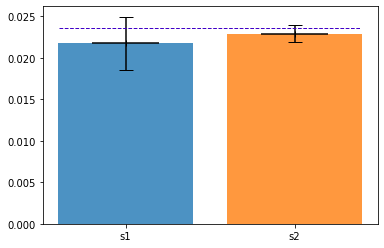

In [7]:
pop_mean = df['오존(ppm)'].mean()
print(pop_mean)

x = np.arange(2)
x_label = ['s1', 's2']
values = [s1_mean, s2_mean]
yerrs = [std_err1, std_err2]
colors = ['#4C92C3', '#FF983E']

plt.axhline(pop_mean, 0.05, 0.95, color='#4000c7', linestyle='dashed', linewidth=1)
plt.errorbar(x, values, yerr=yerrs, fmt='|k', ecolor='black', capsize=7)
plt.bar(x, values, xerr=0.2, color=colors)
plt.xticks(x, x_label)

plt.show()

In [8]:
# 참고
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])


# sample = ['s1', 's2']
# pop_mean = np.mean(df['오존(ppm)'])

# plt.bar(x='s1', height=s1_mean, yerr=CI1[0]-s1_mean, capsize=10)
# plt.bar(x='s2', height=s2_mean, yerr=CI2[0]-s2_mean, capsize=10)
# plt.axhline(pop_mean, linestyle='--', color='#4000c7')
# plt.axhline(s1_mean, color = 'black', xmin = 0.15, xmax = 0.35)
# plt.axhline(s2_mean, color = 'black', xmin = 0.65, xmax = 0.85)

# plt.show()

# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

In [9]:
s_1 = s1[['오존(ppm)']].reset_index()
s_1['index'] = 's1'
s_2 = s2[['오존(ppm)']].reset_index()
s_2['index'] = 's2'

s_1 = s_1.melt(id_vars = 'index', value_vars = ['오존(ppm)'])
s_2 = s_2.melt(id_vars = 'index', value_vars = ['오존(ppm)'])

s = pd.concat([s_1, s_2])
s

,index,variable,value
0,s1,오존(ppm),0.021
1,s1,오존(ppm),0.020
2,s1,오존(ppm),0.002
3,s1,오존(ppm),0.009
4,s1,오존(ppm),0.044
...,...,...,...
195,s2,오존(ppm),0.022
196,s2,오존(ppm),0.026
197,s2,오존(ppm),0.031
198,s2,오존(ppm),0.002


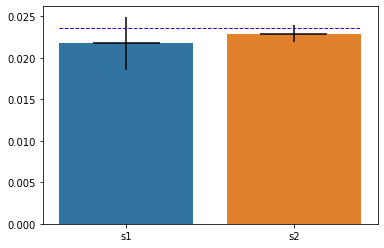

In [10]:
(sns.barplot(x=x_label, y=values, yerr=yerrs, xerr=.2, errwidth=1.5, capsize=0.2)
.axhline(pop_mean, 0.05, 0.95, color='#4000c7', linestyle='dashed', linewidth=1))

plt.show;

## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한정리를 구현하는 코드를 작성하세요.

In [11]:
# 초미세먼지 데이터 준비
df2 = pd.read_csv(data_url, usecols=['초미세먼지(㎍/㎥)'], encoding='cp949')

df2.head()

,초미세먼지(㎍/㎥)
0,22
1,21
2,24
3,18
4,21


In [12]:
# 큰 수의 법칙 구현
# sample 데이터의 수가 커질 수록, sample의 통계치는 점점 모집단의 모수와 같아진다.

# 모집단의 평균과 분산
print(df2.mean())
print(df2.var())

# 표본 크기를 입력하면 이에 해당하는 평균과 분산을 출력하는 함수 선언
def checkStats(num):
  print(df2.sample(n=num, random_state=43).mean())
  print(df2.sample(n=num, random_state=43).var())
  print('-------------------')

초미세먼지(㎍/㎥)    24.649247
dtype: float64
초미세먼지(㎍/㎥)    192.02321
dtype: float64


In [13]:
checkStats(10)
checkStats(100)
checkStats(1000)
checkStats(10000)

# 표본의 크기가 커질 수록 표본의 통계치와 모집단의 통계치가 가까워진다.

초미세먼지(㎍/㎥)    35.3
dtype: float64
초미세먼지(㎍/㎥)    104.455556
dtype: float64
-------------------
초미세먼지(㎍/㎥)    26.43
dtype: float64
초미세먼지(㎍/㎥)    185.338485
dtype: float64
-------------------
초미세먼지(㎍/㎥)    25.364
dtype: float64
초미세먼지(㎍/㎥)    188.04555
dtype: float64
-------------------
초미세먼지(㎍/㎥)    24.4625
dtype: float64
초미세먼지(㎍/㎥)    193.987192
dtype: float64
-------------------


In [14]:
# 중심극한정리 구현
# Sample 데이터의 수가 많아질 수록, sample의 평균은 정규분포에 근사한 형태로 나타난다

# 표본 평균의 크기에 따라 정규 분포에 가까워지는 형태를 확인하기 위한 함수
# 입력된 숫자(num)만큼 표본 평균을 구하여 리스트에 저장 후 이를 히스토그램으로 출력함
def checkCLTbyNum(num):
  sample_means = []
  for x in range(0, num):
    sample = df2.sample(n=100).mean()
    sample_means.append(sample.mean())

  pd.DataFrame(sample_means).hist(color = '#4000c7');

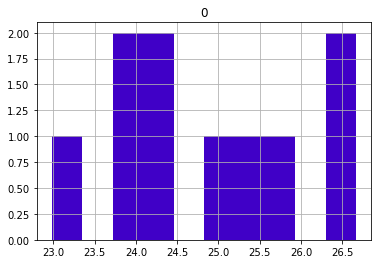

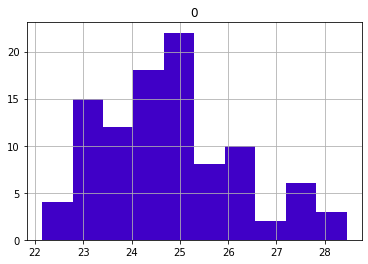

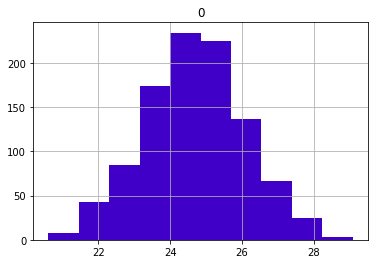

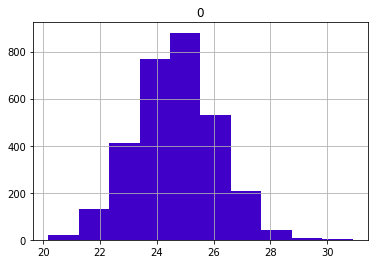

In [15]:
checkCLTbyNum(10)
checkCLTbyNum(100)
checkCLTbyNum(1000)
checkCLTbyNum(3000)

# 표본 평균을 많이 가져올 수록 정규 분포에 가까워진다

In [16]:
# 표본의 크기에 따른 표본 평균의 분포 형태 변화 확인하기
sample_means_s = []
sample_means_m = []
sample_means_l = []

for x in range(0, 1000):
  sample_s = df2.sample(n=10).mean()
  sample_m = df2.sample(n=100).mean()
  sample_l = df2.sample(n=1000).mean()
  sample_means_s.append(sample_s.mean())
  sample_means_m.append(sample_m.mean())
  sample_means_l.append(sample_l.mean())

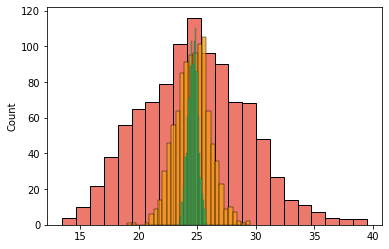

In [17]:
sns.histplot(sample_means_s, color = '#e74c3c')
sns.histplot(sample_means_m, color = '#f39c12')
sns.histplot(sample_means_l, color = '#27ae60');
# sample_means_s -> red 
# sample_means_m -> orange
# sample_means_l -> green

# 표본을 많이 추출할 수록 표본 평균 분포의 편차가 줄어든다